In [1]:
from preprocess import *
from lightGBM import*

In [2]:
train_df, test_df = preprocessing()

Train samples: 307511, test samples: 48744
Application df shape: (356255, 112)
Process application files - done in 0h 00min 08.534445sec
Bureau df shape: (305811, 29)
Process bureau and bureau_balance - done in 0h 00min 18.192420sec
Previous applications df shape: (338605, 52)
Process previous_applications - done in 0h 00min 08.499801sec
Pos-cash balance df shape: (337252, 8)
Process POS-CASH balance - done in 0h 00min 14.897187sec
Installments payments df shape: (339587, 28)
Process installments payments - done in 0h 00min 22.283870sec
Credit card balance df shape: (103558, 6)
Process credit card balance - done in 0h 00min 06.945537sec
Preprocessing Done. Train shape: (307511, 232), test shape: (48744, 232)


# Evaluation du modèle avant traitement imbalance class

In [136]:
feat_importance, oof_preds, sub_preds = kfold_lightgbm(train_df, test_df, num_folds=5,
                                                               smote=False, class_weight={0: 1, 1: 1},
                                                               vis=True, fbeta=1, contrib=False)

class_weight : {0: 1, 1: 1}
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.795014	training's binary_logloss: 0.236009	valid_1's auc: 0.772099	valid_1's binary_logloss: 0.243254
[400]	training's auc: 0.816653	training's binary_logloss: 0.226891	valid_1's auc: 0.782258	valid_1's binary_logloss: 0.239304
[600]	training's auc: 0.830609	training's binary_logloss: 0.221132	valid_1's auc: 0.78561	valid_1's binary_logloss: 0.23805
[800]	training's auc: 0.842159	training's binary_logloss: 0.216345	valid_1's auc: 0.787058	valid_1's binary_logloss: 0.237482
[1000]	training's auc: 0.851773	training's binary_logloss: 0.212293	valid_1's auc: 0.787859	valid_1's binary_logloss: 0.237199
[1200]	training's auc: 0.860692	training's binary_logloss: 0.20852	valid_1's auc: 0.788379	valid_1's binary_logloss: 0.237024
[1400]	training's auc: 0.868545	training's binary_logloss: 0.205003	valid_1's auc: 0.78826	valid_1's binary_logloss: 0.237009
Early stopping, best iteratio

<Figure size 800x550 with 0 Axes>

Détermination du Beta

In [137]:
f_scores=[]
f_scores_0=[]
f_scores_1=[]
for i in range(1,20):
    summary = score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.5, beta=i, verbose=False)
    f_scores.append(summary.iloc[2,2])
    f_scores_0.append(summary.iloc[2,0])
    f_scores_1.append(summary.iloc[2,1])

Text(0, 0.5, 'Class 1 f_score')

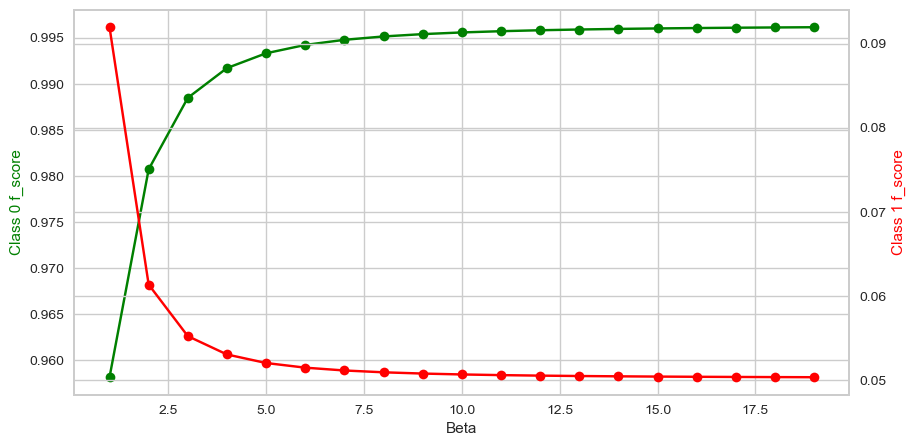

In [138]:
fig, ax1 = plt.subplots( figsize=(10,5))
ax1.plot(range(1,20),f_scores_0,'-o', color='green')
ax1.set_ylabel('Class 0 f_score', color='green')
ax1.set_xlabel('Beta')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(range(1,20),f_scores_1,'-o', color='red')
ax2.set_ylabel('Class 1 f_score', color='red')


Model evaluation with standard threshold

In [139]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.5, beta=4, verbose=True)

Full AUC score 0.788429
Full accuracy score 0.919970
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision   0.922751  0.547211         0.892434
recall      0.996353  0.050191          0.91997
f4            0.9917  0.053024         0.915922
population  282686.0   24825.0             None


In [140]:
summary.loc['f4',['Class_0', 'Class_1']].mean()

0.5223620759060402

In [141]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.365916160374218

threshold determination

In [142]:
f_scores=[]
f_scores_0=[]
f_scores_1=[]
for i in [j/10 for j in range(1,6)]:
    summary = score_lightgbm(oof_preds, train_df['TARGET'], threshold=i, beta=4, verbose=False)
    f_scores.append(summary.iloc[2,2])
    f_scores_0.append(summary.iloc[2,0])
    f_scores_1.append(summary.iloc[2,1])

Text(0, 0.5, 'Class 1 f_score')

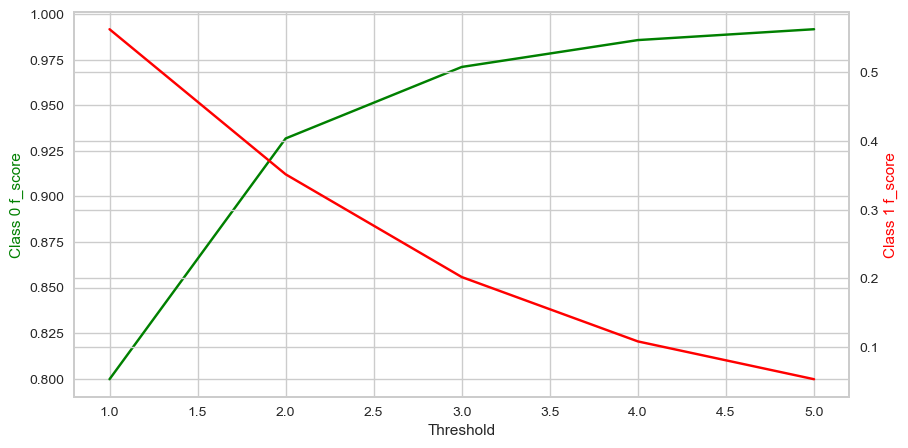

In [143]:
fig, ax1 = plt.subplots( figsize=(10,5))
ax1.plot(range(1,6),f_scores_0, color='green')
ax1.set_ylabel('Class 0 f_score', color='green')
ax1.set_xlabel('Threshold')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(range(1,6),f_scores_1, color='red')
ax2.set_ylabel('Class 1 f_score', color='red')

In [144]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.3, beta=4, verbose=True)

Full AUC score 0.788429
Full accuracy score 0.910745
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision   0.932367  0.393812          0.88889
recall      0.973525  0.195851         0.910745
f4          0.971004  0.201819         0.908909
population  282686.0   24825.0             None


In [145]:
summary.loc['f4',['Class_0', 'Class_1']].mean()

0.5864112805166051

In [146]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.4582137200549772

# Evaluation du modèle avec changement du paramètre class_weight

In [147]:
feat_importance, oof_preds, sub_preds = kfold_lightgbm(train_df, test_df, num_folds=5,
                                                               smote=False, class_weight={0: 1, 1: 6},
                                                               vis=False, fbeta=1, contrib=False)

class_weight : {0: 1, 1: 6}
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.796442	training's binary_logloss: 0.520343	valid_1's auc: 0.77036	valid_1's binary_logloss: 0.397849
[400]	training's auc: 0.820619	training's binary_logloss: 0.493712	valid_1's auc: 0.78131	valid_1's binary_logloss: 0.385006
[600]	training's auc: 0.837278	training's binary_logloss: 0.476456	valid_1's auc: 0.784665	valid_1's binary_logloss: 0.378419
[800]	training's auc: 0.850707	training's binary_logloss: 0.46284	valid_1's auc: 0.785732	valid_1's binary_logloss: 0.373683
[1000]	training's auc: 0.86259	training's binary_logloss: 0.450549	valid_1's auc: 0.786249	valid_1's binary_logloss: 0.369481
[1200]	training's auc: 0.873474	training's binary_logloss: 0.439085	valid_1's auc: 0.786456	valid_1's binary_logloss: 0.365603
[1400]	training's auc: 0.883421	training's binary_logloss: 0.4282	valid_1's auc: 0.786562	valid_1's binary_logloss: 0.361999
Early stopping, best iteration 

Model evaluation with standard threshold

In [148]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.5, beta=4, verbose=True)

Full AUC score 0.787768
Full accuracy score 0.855013
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision   0.949374  0.267999         0.894368
recall      0.889726  0.459738         0.855013
f4          0.893026  0.441171         0.856548
population  282686.0   24825.0             None


In [149]:
summary.loc['f4',['Class_0', 'Class_1']].mean()

0.6670987901910252

In [150]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.5917896560947828

threshold determination

In [151]:
f_scores=[]
f_scores_0=[]
f_scores_1=[]
for i in [j/10 for j in range(1,6)]:
    summary = score_lightgbm(oof_preds, train_df['TARGET'], threshold=i, beta=4, verbose=False)
    f_scores.append(summary.iloc[2,2])
    f_scores_0.append(summary.iloc[2,0])
    f_scores_1.append(summary.iloc[2,1])

Text(0, 0.5, 'Class 1 f_score')

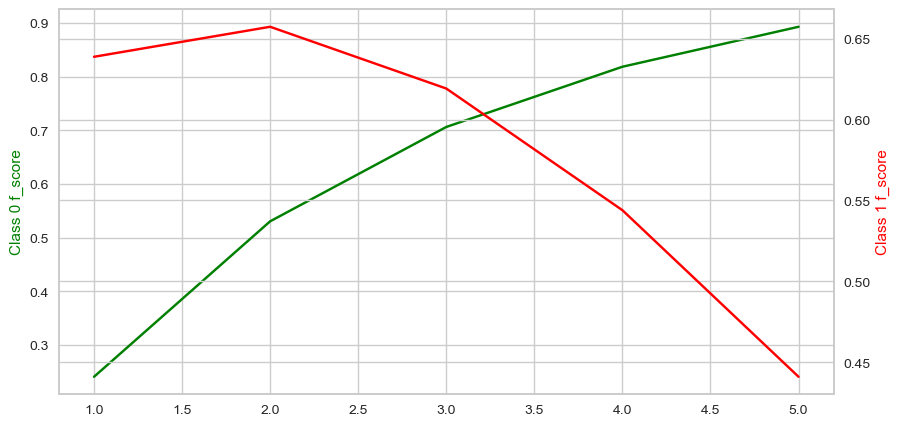

In [152]:
fig, ax1 = plt.subplots( figsize=(10,5))
ax1.plot(range(1,6),f_scores_0, color='green')
ax1.set_ylabel('Class 0 f_score', color='green')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(range(1,6),f_scores_1, color='red')
ax2.set_ylabel('Class 1 f_score', color='red')

In [153]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.2, beta=4, verbose=True)

Full AUC score 0.787768
Full accuracy score 0.544130
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision    0.97756  0.135661         0.909594
recall       0.51594  0.865136          0.54413
f4          0.530681  0.657245         0.540898
population  282686.0   24825.0             None


In [154]:
summary.loc['f4',['Class_0', 'Class_1']].mean()

0.5939631339092517

In [155]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.615057209923859

In [156]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.3, beta=4, verbose=True)

Full AUC score 0.787768
Full accuracy score 0.698053
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision   0.967719  0.174745         0.903703
recall      0.694711  0.736113         0.698053
f4          0.706434  0.619118         0.699385
population  282686.0   24825.0             None


In [157]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.6482234262214194

In [166]:
feat_importance, oof_preds, sub_preds = kfold_lightgbm(train_df, test_df, num_folds=5,
                                                               smote=False, class_weight={0: 1, 1: 12},
                                                               vis=False, fbeta=1, contrib=False)

class_weight : {0: 1, 1: 12}
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.79693	training's binary_logloss: 0.555944	valid_1's auc: 0.769698	valid_1's binary_logloss: 0.581044
[400]	training's auc: 0.821965	training's binary_logloss: 0.525272	valid_1's auc: 0.780822	valid_1's binary_logloss: 0.556644
[600]	training's auc: 0.83838	training's binary_logloss: 0.505809	valid_1's auc: 0.78454	valid_1's binary_logloss: 0.542839
[800]	training's auc: 0.852103	training's binary_logloss: 0.490039	valid_1's auc: 0.785656	valid_1's binary_logloss: 0.532138
[1000]	training's auc: 0.864354	training's binary_logloss: 0.475778	valid_1's auc: 0.786424	valid_1's binary_logloss: 0.522351
[1200]	training's auc: 0.87528	training's binary_logloss: 0.462773	valid_1's auc: 0.786774	valid_1's binary_logloss: 0.513591
[1400]	training's auc: 0.885105	training's binary_logloss: 0.450773	valid_1's auc: 0.786785	valid_1's binary_logloss: 0.505634
[1600]	training's auc: 0.894

Model evaluation with standard threshold

In [167]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.5, beta=4, verbose=True)

Full AUC score 0.786907
Full accuracy score 0.743791
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision   0.964076  0.192797         0.901811
recall      0.749209  0.682095         0.743791
f4          0.759162  0.593494         0.745788
population  282686.0   24825.0             None


In [168]:
summary.loc['f4',['Class_0', 'Class_1']].mean()

0.6763278393345425

In [169]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.6487164167247451

threshold determination

In [170]:
f_scores=[]
f_scores_0=[]
f_scores_1=[]
for i in [j/10 for j in range(1,6)]:
    summary = score_lightgbm(oof_preds, train_df['TARGET'], threshold=i, beta=4, verbose=False)
    f_scores.append(summary.iloc[2,2])
    f_scores_0.append(summary.iloc[2,0])
    f_scores_1.append(summary.iloc[2,1])

Text(0, 0.5, 'Class 1 f_score')

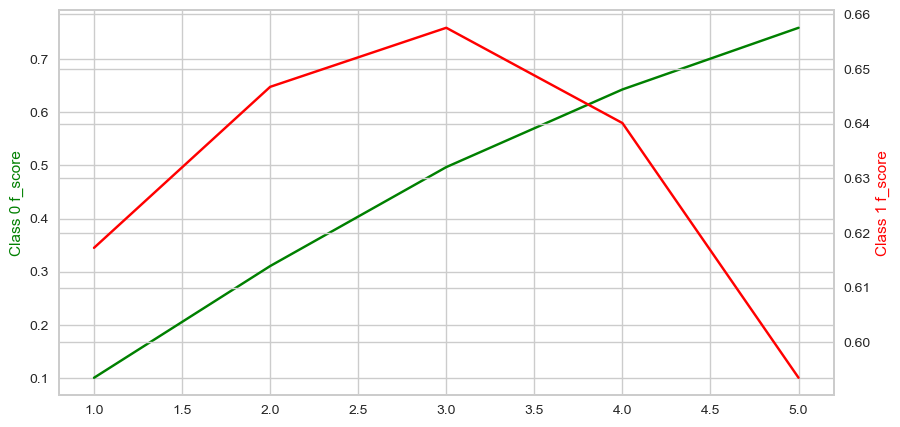

In [171]:
fig, ax1 = plt.subplots( figsize=(10,5))
ax1.plot(range(1,6),f_scores_0, color='green')
ax1.set_ylabel('Class 0 f_score', color='green')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(range(1,6),f_scores_1, color='red')
ax2.set_ylabel('Class 1 f_score', color='red')

In [177]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.3, beta=4, verbose=True)

Full AUC score 0.786907
Full accuracy score 0.514261
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision   0.978789  0.129967         0.910265
recall      0.482051  0.881047         0.514261
f4          0.496884  0.657526         0.509853
population  282686.0   24825.0             None


In [178]:
summary.loc['f4',['Class_0', 'Class_1']].mean()

0.5772053984896739

In [179]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.6039790972491975

In [180]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.4, beta=4, verbose=True)

Full AUC score 0.786907
Full accuracy score 0.642751
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision   0.971677  0.157966         0.905987
recall      0.629734  0.790977         0.642751
f4          0.643045  0.640094         0.642807
population  282686.0   24825.0             None


In [181]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.6410775390768122

# Class imbalance with SMOTE

In [158]:
feat_importance, oof_preds, sub_preds = kfold_lightgbm(train_df, test_df, num_folds=5,
                                                               smote=True, overstrat=0.5, understrat=0.9,class_weight=None,
                                                               vis=False, fbeta=1, contrib=False)

SMOTE resampling fold :  1
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.957898	training's binary_logloss: 0.24806	valid_1's auc: 0.752219	valid_1's binary_logloss: 0.291499
[400]	training's auc: 0.963671	training's binary_logloss: 0.212321	valid_1's auc: 0.771772	valid_1's binary_logloss: 0.264913
[600]	training's auc: 0.966989	training's binary_logloss: 0.200748	valid_1's auc: 0.779045	valid_1's binary_logloss: 0.258292
[800]	training's auc: 0.969451	training's binary_logloss: 0.193746	valid_1's auc: 0.782225	valid_1's binary_logloss: 0.255596
[1000]	training's auc: 0.971663	training's binary_logloss: 0.188337	valid_1's auc: 0.783965	valid_1's binary_logloss: 0.254188
[1200]	training's auc: 0.973564	training's binary_logloss: 0.183847	valid_1's auc: 0.784849	valid_1's binary_logloss: 0.253459
[1400]	training's auc: 0.975305	training's binary_logloss: 0.179759	valid_1's auc: 0.785408	valid_1's binary_logloss: 0.252993
[1600]	training's auc: 0.97

Model evaluation with standard threshold

In [159]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.5, beta=4, verbose=True)

Full AUC score 0.784361
Full accuracy score 0.914933
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision   0.929002  0.421805         0.888057
recall      0.982553  0.144935         0.914933
f4          0.979233  0.150755         0.912351
population  282686.0   24825.0             None


In [160]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.4269145208996439

threshold determination

In [161]:
f_scores=[]
f_scores_0=[]
f_scores_1=[]
for i in [j/10 for j in range(1,6)]:
    summary = score_lightgbm(oof_preds, train_df['TARGET'], threshold=i, beta=4, verbose=False)
    f_scores.append(summary.iloc[2,2])
    f_scores_0.append(summary.iloc[2,0])
    f_scores_1.append(summary.iloc[2,1])

Text(0, 0.5, 'Class 1 f_score')

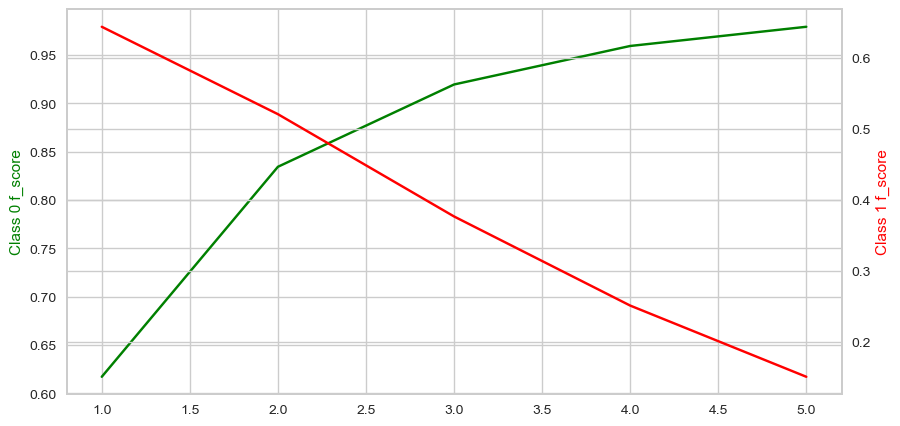

In [162]:
fig, ax1 = plt.subplots( figsize=(10,5))
ax1.plot(range(1,6),f_scores_0, color='green')
ax1.set_ylabel('Class 0 f_score', color='green')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(range(1,6),f_scores_1, color='red')
ax2.set_ylabel('Class 1 f_score', color='red')

In [163]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.2, beta=4, verbose=True)

Full AUC score 0.784361
Full accuracy score 0.806748
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision   0.956087  0.224313         0.897011
recall      0.827798  0.567049         0.806748
f4          0.834384  0.520287         0.809027
population  282686.0   24825.0             None


In [164]:
summary.loc['f4',['Class_0', 'Class_1']].mean()

0.6773354178860684

In [165]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.6249858529499989

In [3]:
feat_importance, oof_preds, sub_preds = kfold_lightgbm(train_df, test_df, num_folds=5,
                                                               smote=True, overstrat=0.15, understrat=0.9,class_weight=None,
                                                               vis=False, fbeta=1, contrib=False)

SMOTE resampling fold :  1
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.873897	training's binary_logloss: 0.450894	valid_1's auc: 0.766053	valid_1's binary_logloss: 0.440733
[400]	training's auc: 0.892484	training's binary_logloss: 0.410884	valid_1's auc: 0.77813	valid_1's binary_logloss: 0.414156
[600]	training's auc: 0.90363	training's binary_logloss: 0.391359	valid_1's auc: 0.78177	valid_1's binary_logloss: 0.406987
[800]	training's auc: 0.912306	training's binary_logloss: 0.377288	valid_1's auc: 0.783247	valid_1's binary_logloss: 0.403836
[1000]	training's auc: 0.91995	training's binary_logloss: 0.365229	valid_1's auc: 0.784034	valid_1's binary_logloss: 0.401994
[1200]	training's auc: 0.927017	training's binary_logloss: 0.354068	valid_1's auc: 0.784391	valid_1's binary_logloss: 0.400631
[1400]	training's auc: 0.933149	training's binary_logloss: 0.344207	valid_1's auc: 0.784509	valid_1's binary_logloss: 0.39981
[1600]	training's auc: 0.938561

Model evaluation with standard threshold

In [11]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.5, beta=4, verbose=True)

Full AUC score 0.783567
Full accuracy score 0.830299
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision   0.952454   0.24085         0.895007
recall      0.858238  0.512145         0.830299
f4          0.863262  0.480319         0.832347
population  282686.0   24825.0             None


In [12]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.6079668443291357

threshold determination

In [13]:
f_scores=[]
f_scores_0=[]
f_scores_1=[]
for i in [j/10 for j in range(1,6)]:
    summary = score_lightgbm(oof_preds, train_df['TARGET'], threshold=i, beta=4, verbose=False)
    f_scores.append(summary.iloc[2,2])
    f_scores_0.append(summary.iloc[2,0])
    f_scores_1.append(summary.iloc[2,1])

Text(0, 0.5, 'Class 1 f_score')

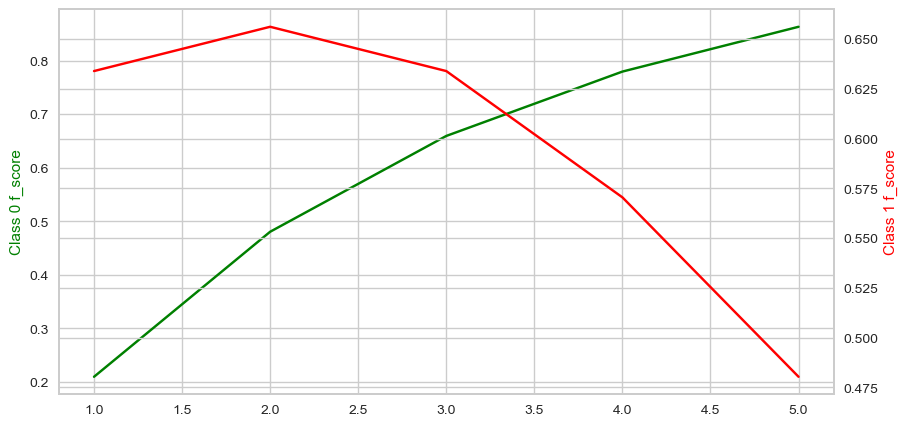

In [14]:
fig, ax1 = plt.subplots( figsize=(10,5))
ax1.plot(range(1,6),f_scores_0, color='green')
ax1.set_ylabel('Class 0 f_score', color='green')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(range(1,6),f_scores_1, color='red')
ax2.set_ylabel('Class 1 f_score', color='red')

In [15]:
summary= score_lightgbm(oof_preds, train_df['TARGET'], threshold=0.3, beta=4, verbose=True)

Full AUC score 0.783567
Full accuracy score 0.656871
Full precision_recall_f4 score: 
              Class_0   Class_1 weighted_average
precision   0.970426   0.16154         0.905126
recall      0.646438   0.77567         0.656871
f4          0.659388  0.633908         0.657331
population  282686.0   24825.0             None


In [16]:
summary.loc['f4',['Class_0', 'Class_1']].mean()

0.6466478864815047

In [17]:
(summary.loc['f4','Class_0']+2*summary.loc['f4', 'Class_1'])/3

0.6424012622218287